In [1]:
#!pip install tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [8 0 4 6 1 9 5 7 1 5]


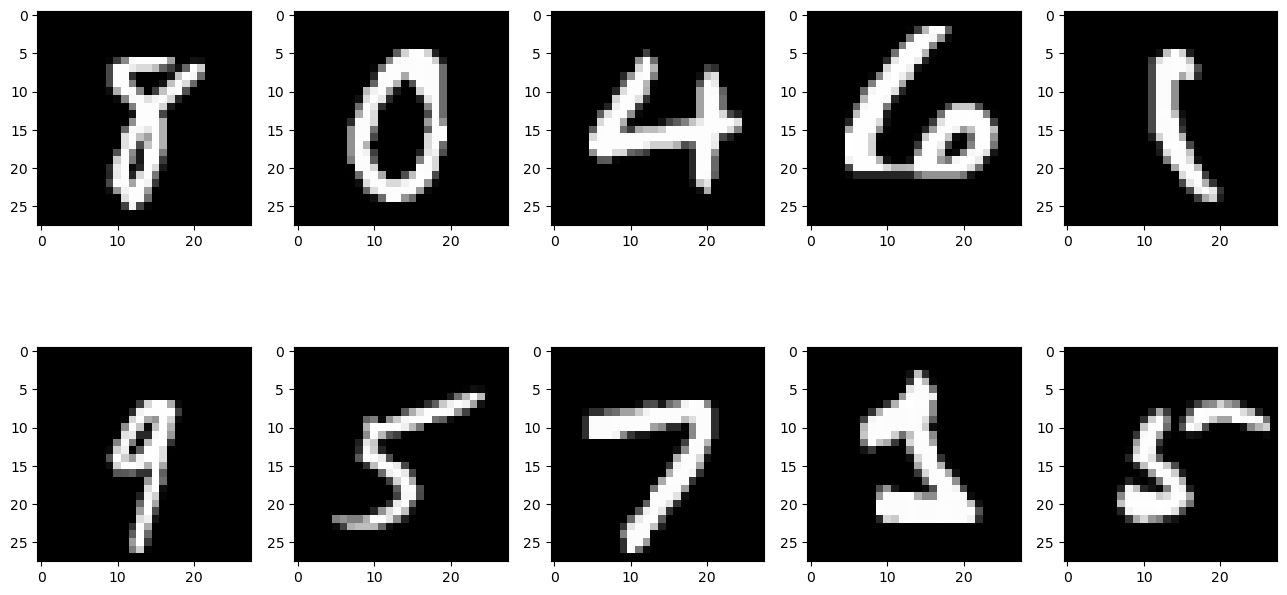

In [4]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])

for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [5]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

model = Sequential()
model.add(Flatten(input_shape=(28,28)))

# Hidden layer 1 with L1 + L2
model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization()) #stabilizes and speeds up training.
model.add(Dropout(0.3)) #prevents overfitting, improves generalization.

# Hidden layer 2 with L1 + L2
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Hidden layer 3 with L2 only
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(1e-4)))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0003),
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Larger batch → faster convergence.
# EarlyStopping → prevents overfitting.
# Validation split → allows monitoring generalization during training


In [34]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,298 (954.29 KB)

 Trainable params: 243,530 (951.29 KB)

 Non-trainable params: 768 (3.00 KB)

Train the model

In [35]:
train_info = model.fit(new_train_data, new_train_target,
                       epochs=50,
                       batch_size=64,
                       validation_split=0.1,
                       callbacks=[early_stop])

Epoch 1/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8553 - loss: 0.6076 - val_accuracy: 0.9592 - val_loss: 0.2628
Epoch 2/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9385 - loss: 0.3249 - val_accuracy: 0.9750 - val_loss: 0.2111
Epoch 3/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9527 - loss: 0.2708 - val_accuracy: 0.9742 - val_loss: 0.1991
Epoch 4/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9602 - loss: 0.2401 - val_accuracy: 0.9780 - val_loss: 0.1851
Epoch 5/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9652 - loss: 0.2186 - val_accuracy: 0.9772 - val_loss: 0.1811
Epoch 6/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9700 - loss: 0.2013 - val_accuracy: 0.9802 - val_loss: 0.1720
Epoch 7/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9728 - loss: 0.1897 - val_accuracy: 0.9817 - val_loss: 0.1642
Epoch 8/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9732 - loss: 0.1837 - val_accuracy: 0.

Plot the loss and accuracy graphs

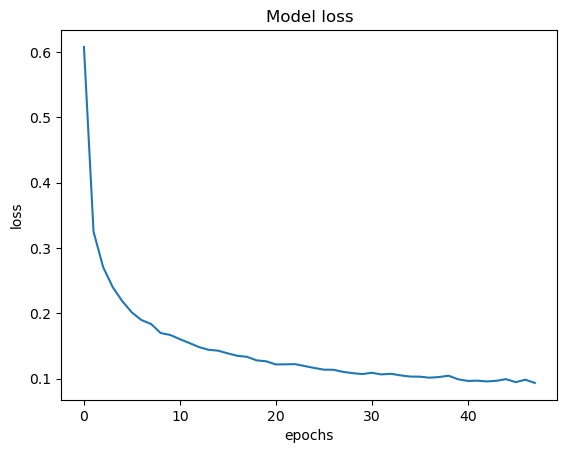

In [36]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

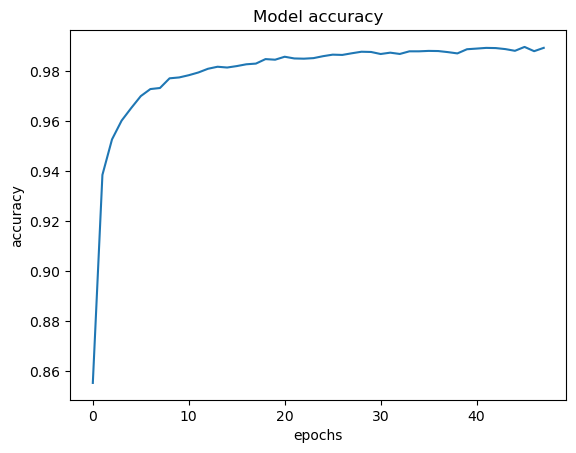

In [37]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [38]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9854 - loss: 0.1181 
Loss of the Test dataset is: 0.1180647686123848
Accuracy of the test dataset is: 0.9854000210762024


Save the model weights

In [29]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')

In [31]:
model.save('MNIST_MODEL_V1.keras')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


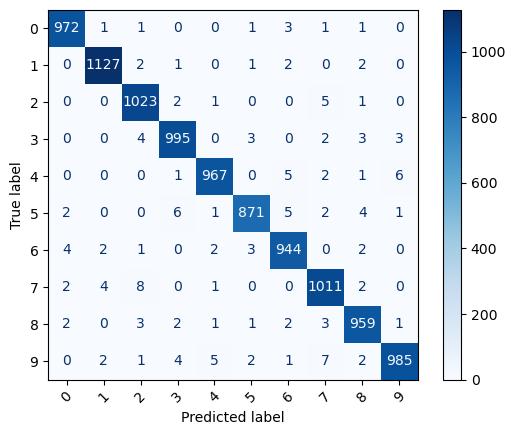

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

y_pred = model.predict(new_test_data)
y_pred_classes = np.argmax(y_pred, axis=1)  # predicted digit
y_true = np.argmax(new_test_target, axis=1) # actual digit

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()
